In [1]:
# Importing libraries
import keras
import os
import shutil
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
source='./Data/CNN_datasets/new'
target='./Data/CNN_datasets/wildLife/train_data/'
shutil.copytree(source, target)
os.mkdir('./Data/CNN_datasets/wildLife/test_data/')

In [3]:
path="./Data/CNN_datasets/wildLife/train_data/"
for file in os.listdir(path):
    for image in os.listdir(path+file+'/'):
        if '.jpg' not in image:
            os.remove(path+file+'/'+image)
    os.mkdir('./Data/CNN_datasets/wildLife/test_data/'+file)

In [4]:
# create test_data by taking 25% images from data

total_train_images,total_test_images,total_train_classes,total_test_classes=0,0,0,0
path="./Data/CNN_datasets/wildLife/train_data/"
for file in os.listdir(path):
    total_train_classes+=1
    total_images=len(os.listdir(path+file+"/"))
    test_image_count=(25/100)*total_images #25% for test and 75% for train
    for i in range(math.ceil(test_image_count)):
        img=random.choice(os.listdir(path+file+'/'))
        shutil.move(path+file+'/'+img,'./Data/CNN_datasets/wildLife/test_data/'+file+'/')
        #print(img)
    print(file,total_images,math.ceil(test_image_count))
    total_train_images+=(total_images-math.ceil(test_image_count))
    #print(file,math.ceil(test_image_count))
print("total train images are : ",total_train_images," and total train classes are : ",total_train_classes)

buffalo 375 94
elephant 375 94
rhino 375 94
zebra 376 94
total train images are :  1125  and total train classes are :  4


In [5]:

model = Sequential()

#inputlayer : apply filters
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        activation='relu',
                   input_shape=(32, 32, 1)))

# pooling layer where we are doing maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#adding one more convolution layer for better model
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same', 
                        activation='relu'
                      ))
#adding one more Pooling layer for better model
model.add(MaxPooling2D(pool_size=(2, 2)))
#dropout regularlization
model.add(Dropout(0.5))
#layer in which we are converting 2d/3d image to 1d image i.e flattening
model.add(Flatten())
# layer: appling relu to give positive output from here our hidden layerrs starts
model.add(Dense(units=20, activation='relu'))
#dropout regularlization
model.add(Dropout(0.5))
# output layer : Since we have to do multi-class classification so we'll apply softmax activation function 
# we have 4 classes of animals so output layer would have that many neurons.
model.add(Dense(units=4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [7]:
#url : https://keras.io/api/preprocessing/image/ 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        './Data/CNN_datasets/wildLife/train_data/',
        target_size=(32,32),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        './Data/CNN_datasets/wildLife/test_data/',
        target_size=(32,32),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')

Found 1125 images belonging to 4 classes.
Found 376 images belonging to 4 classes.


In [8]:
training_set.class_indices # to see classes of our dataset

{'buffalo': 0, 'elephant': 1, 'rhino': 2, 'zebra': 3}

In [9]:
# Model training
history = model.fit(
        training_set,
        steps_per_epoch=(1125/64),
        epochs=50,
        validation_data=test_set,
        validation_steps=(376/64))


Epoch 1/50
17/17 [==============================] - 27s 1s/step - loss: 1.3917 - accuracy: 0.2498 - val_loss: 1.3792 - val_accuracy: 0.3085
Epoch 2/50
17/17 [==============================] - 16s 932ms/step - loss: 1.3811 - accuracy: 0.2880 - val_loss: 1.3610 - val_accuracy: 0.3830
Epoch 3/50
17/17 [==============================] - 16s 953ms/step - loss: 1.3618 - accuracy: 0.3387 - val_loss: 1.3314 - val_accuracy: 0.3617
Epoch 4/50
17/17 [==============================] - 16s 911ms/step - loss: 1.3445 - accuracy: 0.3467 - val_loss: 1.2856 - val_accuracy: 0.3378
Epoch 5/50
17/17 [==============================] - 16s 922ms/step - loss: 1.2959 - accuracy: 0.3627 - val_loss: 1.2085 - val_accuracy: 0.4282
Epoch 6/50
17/17 [==============================] - 16s 944ms/step - loss: 1.2405 - accuracy: 0.4062 - val_loss: 1.2094 - val_accuracy: 0.3989
Epoch 7/50
17/17 [==============================] - 17s 973ms/step - loss: 1.1939 - accuracy: 0.4498 - val_loss: 1.2465 - val_accuracy: 0.3963
Ep

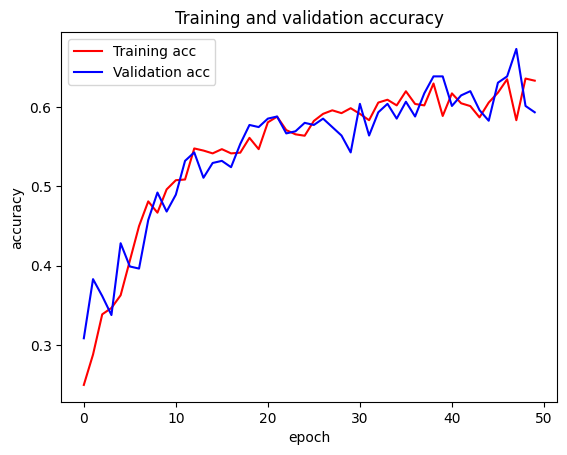

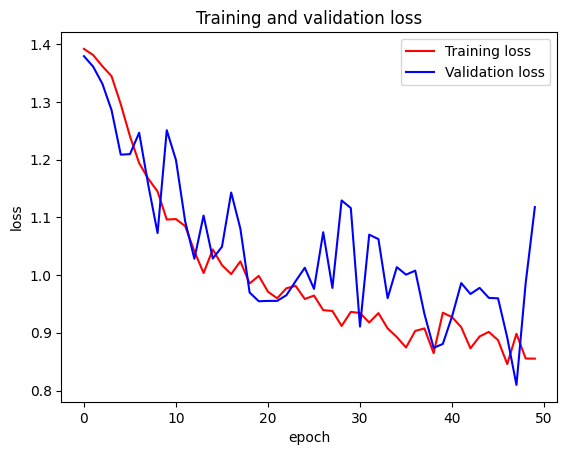

In [10]:
# Training and validation graphing
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [11]:
print("Training Accuracy: {:.4f}".format(accuracy[-1]))

Training Accuracy: 0.6329


In [12]:
# Save the model
model.save('CNN_model.h5')

C:\Users\ASUS TUF X506H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Load model
model = load_model('CNN_model.h5')

# Generate predictions on the validation set
predictions = model.predict(test_set)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_set.classes, predictions.argmax(axis=1))
precision = precision_score(test_set.classes, predictions.argmax(axis=1), average='weighted')
recall = recall_score(test_set.classes, predictions.argmax(axis=1), average='weighted')
f1 = f1_score(test_set.classes, predictions.argmax(axis=1), average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


6/6 [==============================] - 5s 704ms/step
Accuracy: 0.2898936170212766
Precision: 0.2954385362437718
Recall: 0.2898936170212766
F1-score: 0.2825356029241076
